In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Social_Network_Ads.csv')

In [27]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
df = df.iloc[:,2:]

In [29]:
df.sample(5)

,Age,EstimatedSalary,Purchased
1,35,20000,0
7,32,150000,1
149,20,74000,0
114,42,80000,0
366,58,47000,1


# split the data for train and test

In [30]:
from sklearn.model_selection  import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'], test_size = 0.3)

In [32]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [33]:
X_train

,Age,EstimatedSalary
319,36,60000
114,42,80000
17,45,26000
266,40,75000
48,30,135000
...,...,...
174,34,72000
85,31,118000
336,58,144000
290,39,134000


# Standardization on data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
Scaler = StandardScaler()

In [36]:
# fit the scaler to the train set, it will learn the parameters
Scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [38]:
X_train_scaled

array([[-0.15460766, -0.30438284],
       [ 0.4162514 ,  0.29623165],
       [ 0.70168093, -1.32542747],
       [ 0.22596504,  0.14607802],
       [-0.72546672,  1.94792148],
       [-0.91575308,  0.44638527],
       [-0.63032355,  0.1160473 ],
       [ 2.12882858, -0.72481298],
       [ 0.98711046,  1.4674299 ],
       [-1.29632578, -0.45453646],
       [ 0.22596504,  0.14607802],
       [-0.72546672,  1.37733772],
       [-1.67689849,  0.47641599],
       [-1.77204166, -0.0040756 ],
       [-1.67689849, -1.02512023],
       [ 1.55796952,  1.01696903],
       [-1.29632578, -1.14524312],
       [-0.24975084, -0.51459791],
       [-1.01089625,  0.77672323],
       [ 0.7968241 ,  0.1160473 ],
       [-1.86718484,  0.35629309],
       [ 1.93854222, -0.96505878],
       [-1.10603943, -1.05515095],
       [ 0.7968241 ,  1.40736845],
       [-0.53518037,  1.40736845],
       [ 0.7968241 ,  0.26620092],
       [-1.01089625, -0.36444429],
       [ 0.98711046,  0.1160473 ],
       [ 1.74825587,

In [39]:
scaler = StandardScaler()

In [17]:
Y_train

397    1
214    0
64     0
255    1
182    1
      ..
161    0
139    0
311    1
212    0
55     0
Name: Purchased, Length: 280, dtype: int64

In [18]:
y_train_reshaped = Y_train.values.reshape(-1, 1)


In [43]:
scaler.fit(y_train_reshaped)

StandardScaler()

In [44]:
y_train_scaled = scaler.transform(y_train_reshaped)

<Axes: ylabel='Density'>

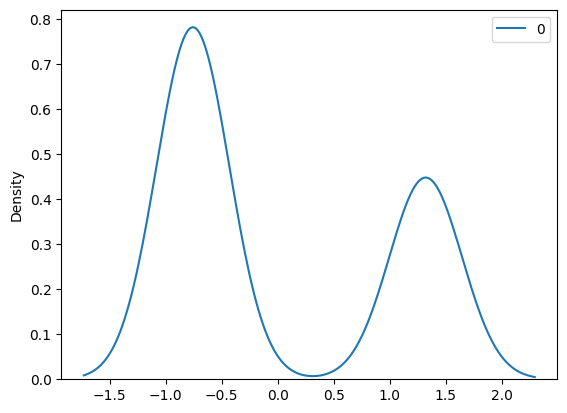

In [45]:
sns.kdeplot(y_train_scaled) # we can see that the y_train nature has been changed intillay it was a step function but now it is standard distribution

In [46]:
y_test_reshaped = Y_test.values.reshape(-1, 1)
y_test_scaled = scaler.transform(y_test_reshaped)

In [47]:
Scaler.mean_, scaler.mean_

(array([3.76250000e+01, 7.01357143e+04]), array([0.36428571]))

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [35]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,68760.7
std,10.7,34399.6
min,18.0,15000.0
25%,29.0,42000.0
50%,37.5,67000.0
75%,47.0,86250.0
max,60.0,150000.0


In [36]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.1
75%,0.8,0.5
max,2.1,2.4


# effect of scaling

Text(0.5, 1.0, 'After Scaling')

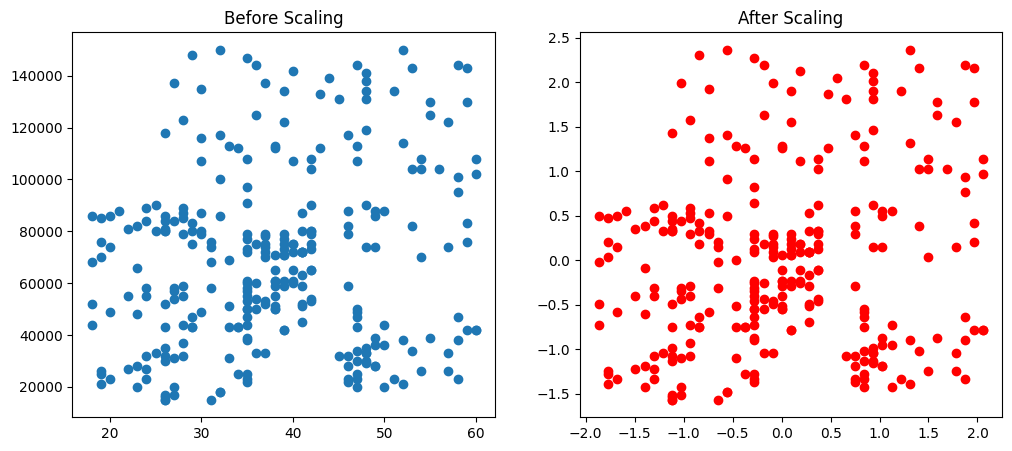

In [42]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize =(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color ='red')
ax2.set_title("After Scaling")


<Axes: xlabel='Age', ylabel='Density'>

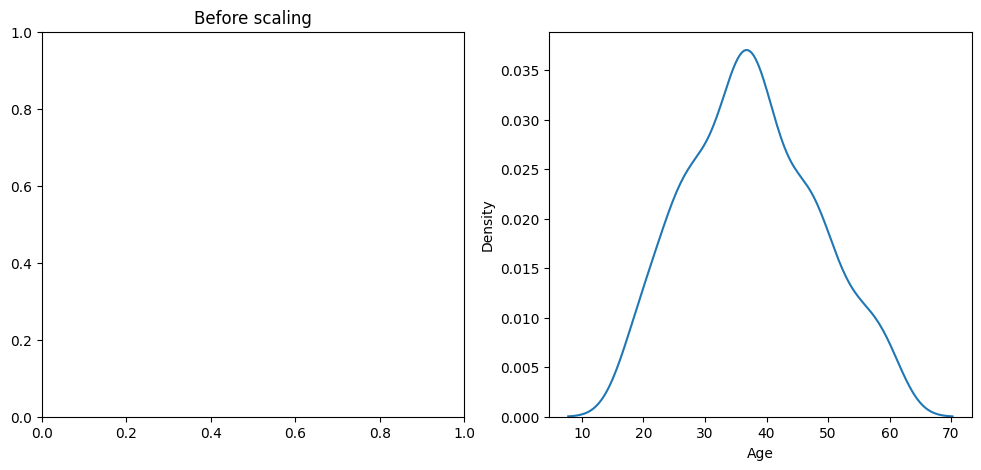

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))
# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'])